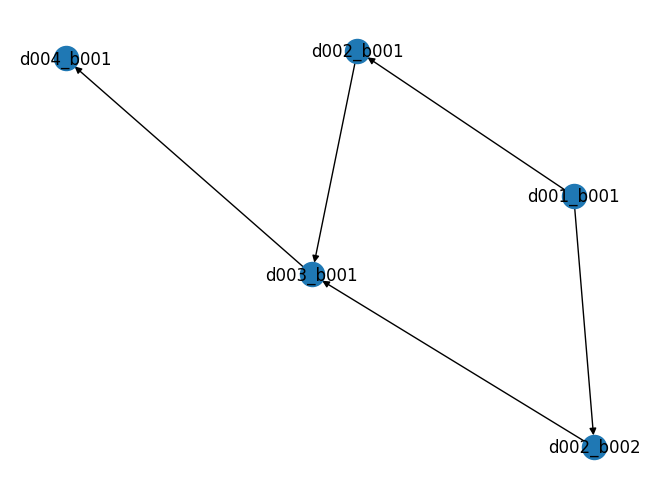

In [3]:
# text graph creation from dictionary
import networkx as nx

graph_dict = {
    'd001_b001': ['d002_b001', 'd002_b002'],
    'd002_b001': ['d003_b001'],
    'd002_b002': ['d003_b001'],
    'd003_b001': ['d004_b001'],
}

G = nx.DiGraph(graph_dict)

# visualize graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()


In [1]:
# read ipynb file with nbformat, export as json - to test the data that is given..
import nbformat as nbf
import json

nb_path = 'data/data_Kaggle/d01.ipynb' 
nb = nbf.read(nb_path, as_version=4)
#export as json
nb_json = json.dumps(nb, indent=2)
print(nb_json)
#save as file
# with open('data/data_Kaggle/d01.json', 'w') as f:
#     f.write(nb_json)


{
  "cells": [
    {
      "cell_type": "code",
      "execution_count": 1,
      "id": "bf2a0cb3",
      "metadata": {
        "_cell_guid": "b1076dfc-b9ad-4769-8c92-a6c4dae69d19",
        "_uuid": "8f2839f25d086af736a60e9eeb907d3b93b6e0e5",
        "execution": {
          "iopub.execute_input": "2023-12-01T12:54:32.802073Z",
          "iopub.status.busy": "2023-12-01T12:54:32.801592Z",
          "iopub.status.idle": "2023-12-01T12:54:35.276813Z",
          "shell.execute_reply": "2023-12-01T12:54:35.275474Z"
        },
        "papermill": {
          "duration": 2.49422,
          "end_time": "2023-12-01T12:54:35.279615",
          "exception": false,
          "start_time": "2023-12-01T12:54:32.785395",
          "status": "completed"
        },
        "tags": []
      },
      "outputs": [
        {
          "name": "stdout",
          "output_type": "stream",
          "text": "/kaggle/input/titanic/train.csv\n/kaggle/input/titanic/test.csv\n/kaggle/input/titanic/gender_submis

In [79]:
dict1 = {"Env": {"Env1": ["Env2", "Env3"], "Env2": ["Env4"], "Env3": ["Env4"]}}
dict2 = {"Env": {"Envx": ["Env4", "Env3"], "Envy": ["Env5"], "Envz": ["Env7"]}}

# I want a function that extends the list for common keys
def merge_dict(dict1, dict2):
    new_dict = dict1.copy()
    for key, value in dict1.items(): # per class
        for sub_key, sub_value in value.items(): # per method
            if sub_key in dict2[key]:
                new_dict[key][sub_key].extend(dict2[key][sub_key])
    
    for key, value in dict2.items():
        for sub_key, sub_value in value.items():
            if sub_key not in dict1[key]:
                new_dict[key][sub_key] = sub_value

    return new_dict

#dict1.update(dict2) # update just overwrites the values of the keys that are common

dict1 = merge_dict(dict1, dict2)
print(dict1)

{'Env': {'Env1': ['Env2', 'Env3'], 'Env2': ['Env4'], 'Env3': ['Env4'], 'Envx': ['Env4', 'Env3'], 'Envy': ['Env5'], 'Envz': ['Env7']}}


In [7]:
class_probability = {
    "Environment": 0,
    "Data_Extraction": 0,
    "Exploratory_Data_Analysis": 0,
    "Data_Transform": 0,
    "Model_Train": 0,
    "Model_Evaluation": 0,
    "Model_Interpretation": 0,
    "Hyperparameter_Tuning": 0,
    "Visualization": 0,
    "Debug": 0,
    "Data_Export": 0,
}

class_keywords = {key: {} for key in class_probability}

# class_keywords = {}
# for key, value in class_probability.items():
#     class_keywords[key] = {}

print(class_keywords)

{'Environment': {}, 'Data_Extraction': {}, 'Exploratory_Data_Analysis': {}, 'Data_Transform': {}, 'Model_Train': {}, 'Model_Evaluation': {}, 'Model_Interpretation': {}, 'Hyperparameter_Tuning': {}, 'Visualization': {}, 'Debug': {}, 'Data_Export': {}}


In [8]:
nb = []
print(len(nb))

0


In [13]:
class Nb:
    def __init__(self, file, idx):
        self.file = file
        self.idx = file['idx']
    
    def get_file(self):
        return self.file
    
file1 = {
    "idx": 1,
    "one": "one",
    "two": "two"
}

nb1 = Nb(file1, 1)

nb1.file['three'] = "three"
print(nb1.file)

{'idx': 1, 'one': 'one', 'two': 'two', 'three': 'three'}


In [17]:
import re

def is_near_empty(cell_source):
    # Remove spaces, tabs, and newlines
    stripped_source = re.sub(r'[\s\n\t#]', '', cell_source)
    # Remove comment lines
    #stripped_source = re.sub(r'#.*', '', stripped_source)
    # Check if the result is empty
    return stripped_source == ''

# Function to filter out near-empty cells
def filter_cells(cells):
    return [
        cell for cell in cells
        if cell['source'].strip() != '' and
        cell['cell_type'] in ['code', 'markdown'] and
        not is_near_empty(cell['source'])
    ]

# Example notebook content
nb_content = {
    "cells": [
        {"cell_type": "code", "source": "print('Hello World')\n"},
        {"cell_type": "markdown", "source": "## This is a header\n"},
        {"cell_type": "code", "source": "\n\t\n"},
        {"cell_type": "markdown", "source": "#\n"},
        {"cell_type": "code", "source": "import numpy as np\n"},
        {"cell_type": "raw", "source": "This is a raw cell\n"},
        {"cell_type": "code", "source": "# This is a comment\n"},
        {"cell_type": "code", "source": "x = 5 # setting x\n"},
    ]
}

# Apply the filter function
nb_content['cells'] = filter_cells(nb_content['cells'])

# Print the filtered cells
for cell in nb_content['cells']:
    print(cell)

{'cell_type': 'code', 'source': "print('Hello World')\n"}
{'cell_type': 'markdown', 'source': '## This is a header\n'}
{'cell_type': 'code', 'source': 'import numpy as np\n'}
{'cell_type': 'code', 'source': '# This is a comment\n'}
{'cell_type': 'code', 'source': 'x = 5 # setting x\n'}


In [31]:
import os 
import nbformat as nbf

# Load all notebooks in the input path
list_unique_keys = []
for file in os.listdir('data/data_Kaggle/raw'):
    # Skip files that are not a notebook
    if not file.endswith('.ipynb'):
        continue
    else:
        file_path = os.path.join('data/data_Kaggle/raw', file)
        with open(file_path, 'r', encoding='utf-8') as f:
            nb_content = nbf.read(f, as_version=4)  # Read the notebook

            # Skip notebooks with less than 5 code or 1 markdown cells
            n_code_cells = len([cell for cell in nb_content['cells'] if cell['cell_type'] == 'code'])
            n_markdown_cells = len([cell for cell in nb_content['cells'] if cell['cell_type'] == 'markdown'])
            
            if n_code_cells < 5 or n_markdown_cells < 1:
                continue

            for cell in nb_content['cells']:
                # check if metadata has papermill
                if 'papermill' not in cell['metadata']:
                    unique_keys = list(cell['metadata'].keys())
                    list_unique_keys.extend(unique_keys)


            # Remove empty cells and raw cells
            nb_content['cells'] = [cell for cell in nb_content['cells'] if cell['source'].strip() != '' and re.sub(r'[\s\n\t#]', '', cell['source']) != '' and cell['cell_type'] in ['code', 'markdown']]
print(set(list_unique_keys))

{'_kg_hide-output', 'jupyter', 'tags', 'id', 'outputId', '_uuid', '_kg_hide-input', '_execution_state', 'collapsed', '_cell_guid', 'scrolled', 'execution'}


In [32]:
l = [1,2,3,4,5,6,7,8,9]
for a, b in enumerate(l):
    print(a, b)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9


In [35]:
class Animal:
    def __init__(self, name):
        self.name = name
        self.noise = {}
    
    def set_noise(self, noise_type, noise):
        self.noise[noise_type] = noise

class Dog(Animal):
    def __init__(self, name):
        super().__init__(name)
        

dog1 = Dog("Peter")
dog1.set_noise('eat', 'nom nom')

dog1.noise['eat']

'nom nom'

False


In [40]:
# from transformers import GPTNeoForCausalLM, GPT2Tokenizer

# # Load the tokenizer and model
# tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-1.3B")
# model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-1.3B")

ex_Environment = """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
"""

ex_Data_Extraction = """
    data = pd.read_csv("data.csv")
"""

ex_Exploratory_Data_Analysis = """
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True)
    plt.show()
"""

ex_Data_Transform = """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
"""

ex_Model_Train = """
    model = RandomForestClassifier()
    model.fit(data, target)
"""

ex_Model_Evaluation = """
    predictions = model.predict(data)
    accuracy = accuracy_score(target, predictions)
    return accuracy
"""

ex_Model_Interpretation = """
    feature_importances = model.feature_importances_
"""

ex_Hyperparameter_Tuning = """
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
    }
"""

ex_Visualization = """
    plt.plot(data)
    plt.show()
"""

ex_Debug = """
    print("Debugging")
"""

ex_Data_Export = """
    data.to_csv("output.csv")
"""

ex_Environment_Exploratory_Data_Analysis = """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    data = pd.read_csv("data.csv")
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True)
"""

ex_Model_Train_Model_Evaluation = """
    model = RandomForestClassifier()
    model.fit(data, target)
    predictions = model.predict(data)
    accuracy = accuracy_score(target, predictions)
    print(accuracy)
"""

ex_Model_Train_Model_Interpretation = """
    model = RandomForestClassifier()
    model.fit(data, target)
    feature_importances = model.feature_importances_
    print(feature_importances)
"""

ex_Model_Train_Hyperparameter_Tuning = """
    model = RandomForestClassifier()
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
    }
    grid_search = GridSearchCV(model, param_grid)
    grid_search.fit(data, target)
"""

ex_Model_Train_Visualization = """
    model = RandomForestClassifier()
    model.fit(data, target)
    plt.plot(data)
    plt.show()
"""

EDA_snippets1 = [
    """import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())""",
    """import pandas as pd
df = pd.read_csv('data.csv')
print(df.iloc[:5])""",
    """import pandas as pd
df = pd.read_csv('data.csv')
for i, row in df.iterrows():
    if i < 5:
        print(row)
    else:
        break""",
    """import pandas as pd
df = pd.read_csv('data.csv')
for row in df.values[:5]:
    print(row)""",
    """import pandas as pd
df = pd.read_csv('data.csv')
print(df.query('index < 5'))"""
]

EDA_snippets2 = [
    """import pandas as pd
df = pd.read_csv('data.csv')
print(df.describe())""",
    """import pandas as pd
df = pd.read_csv('data.csv')
def summary_stats(data):
    return {
        'mean': data.mean(),
        'std': data.std(),
        'min': data.min(),
        '25%': data.quantile(0.25),
        '50%': data.median(),
        '75%': data.quantile(0.75),
        'max': data.max()
    }
print(df.apply(summary_stats))""",
    """import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
print(np.mean(df), np.std(df), np.min(df), np.percentile(df, 25), np.median(df), np.percentile(df, 75), np.max(df))""",
    """import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
summary = df.aggregate([np.mean, np.std, np.min, np.max])
print(summary)""",
    """import pandas as pd
df = pd.read_csv('data.csv')
print(df.agg(lambda x: (x.mean(), x.std(), x.min(), x.quantile(0.25), x.median(), x.quantile(0.75), x.max())))"""
]


Model_Evaluation_snippets1 = [
    """from sklearn.metrics import accuracy_score
y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
print(accuracy_score(y_true, y_pred))""",
    """y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
accuracy = sum(yt == yp for yt, yp in zip(y_true, y_pred)) / len(y_true)
print(accuracy)""",
    """import numpy as np
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0, 0, 0, 1])
accuracy = np.sum(y_true == y_pred) / len(y_true)
print(accuracy)""",
    """import pandas as pd
y_true = pd.Series([0, 1, 0, 1])
y_pred = pd.Series([0, 0, 0, 1])
accuracy = (y_true == y_pred).mean()
print(accuracy)""",
    """def calculate_accuracy(y_true, y_pred):
    correct = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct += 1
    return correct / len(y_true)

y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
print(calculate_accuracy(y_true, y_pred))"""
]

Model_Evaluation_snippets2 = [
    """from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
print(confusion_matrix(y_true, y_pred))""",
    """y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
tp = sum((yt == 1) and (yp == 1) for yt, yp in zip(y_true, y_pred))
tn = sum((yt == 0) and (yp == 0) for yt, yp in zip(y_true, y_pred))
fp = sum((yt == 0) and (yp == 1) for yt, yp in zip(y_true, y_pred))
fn = sum((yt == 1) and (yp == 0) for yt, yp in zip(y_true, y_pred))
print([[tn, fp], [fn, tp]])""",
    """import numpy as np
y_true = np.array([0, 1, 0, 1])
y_pred = np.array([0, 0, 0, 1])
confusion = np.zeros((2, 2))
for yt, yp in zip(y_true, y_pred):
    confusion[yt, yp] += 1
print(confusion)""",
    """import pandas as pd
y_true = pd.Series([0, 1, 0, 1])
y_pred = pd.Series([0, 0, 0, 1])
confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion)""",
    """def custom_confusion_matrix(y_true, y_pred):
    labels = sorted(set(y_true))
    matrix = [[0] * len(labels) for _ in labels]
    label_to_index = {label: i for i, label in enumerate(labels)}
    for yt, yp in zip(y_true, y_pred):
        matrix[label_to_index[yt]][label_to_index[yp]] += 1
    return matrix

y_true = [0, 1, 0, 1]
y_pred = [0, 0, 0, 1]
print(custom_confusion_matrix(y_true, y_pred))"""
]

import torch

list_all_snippets = []
list_all_snippets.extend(EDA_snippets1)
list_all_snippets.extend(EDA_snippets2)
list_all_snippets.extend(Model_Evaluation_snippets1)
list_all_snippets.extend(Model_Evaluation_snippets2)

def load_model_tokenizer(embedding_method="UniXcoder"):
    if embedding_method == "UniXcoder":
        from transformers import AutoModel, AutoTokenizer
        tokenizer = AutoTokenizer.from_pretrained("microsoft/unixcoder-base")
        model = AutoModel.from_pretrained("microsoft/unixcoder-base")
    elif embedding_method == "CodeBERT":
        from transformers import RobertaTokenizer, RobertaModel
        tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")
        model = RobertaModel.from_pretrained("microsoft/codebert-base")
    elif embedding_method == "CodeBERTa":
        from transformers import RobertaTokenizer, RobertaModel
        tokenizer = RobertaTokenizer.from_pretrained("huggingface/CodeBERTa-small-v1")
        model = RobertaModel.from_pretrained("huggingface/CodeBERTa-small-v1")
    elif embedding_method == "GraphCodeBERT":
        from transformers import AutoModel, AutoTokenizer
        tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
        model = AutoModel.from_pretrained("microsoft/graphcodebert-base")
    elif embedding_method == "CodeT5":
        from transformers import AutoModel, AutoTokenizer
        tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")
        model = AutoModel.from_pretrained("Salesforce/codet5-base")
    else:
        raise ValueError("Unknown embedding method specified, try 'UniXcoder', 'CodeBERT', 'CodeBERTa', 'GraphCodeBERT', or 'CodeT5'")

    return tokenizer, model

def get_embedding(text, tokenizer, model, embedding_method):
    inputs = tokenizer(text, return_tensors="pt")
    if embedding_method == "CodeT5":
        # Use the encoder only, as we are not generating any output sequence
        encoder_outputs = model.encoder(**inputs)
        last_hidden_state = encoder_outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_state, dim=1) # Mean pooling to get a single vector representation of the input
    else: 
        outputs = model(**inputs)
        pooled_output = torch.mean(outputs.last_hidden_state, dim=1)
    return pooled_output

# Load the tokenizer and model
tokenizer, model = load_model_tokenizer(embedding_method="CodeT5")

all_emb = []
for sn_n, snippet in enumerate(list_all_snippets):
    embedding = get_embedding(snippet, tokenizer, model)
    all_emb.append(embedding)

# calculate all cosine similarities matrix
import torch.nn.functional as F
import torch

cosine_similarities = []
for emb1 in all_emb:
    sim = []
    for emb2 in all_emb:
        sim.append(F.cosine_similarity(emb1, emb2).item())
    cosine_similarities.append(sim)

print(cosine_similarities)
cos = cosine_similarities

[[1.0, 0.9527104496955872, 0.7274497151374817, 0.8926185369491577, 0.9507895112037659, 0.978919506072998, 0.5231166481971741, 0.6662749648094177, 0.7558985352516174, 0.6025959849357605, 0.4917254149913788, 0.44146066904067993, 0.5106316208839417, 0.5897820591926575, 0.3950498104095459, 0.49865931272506714, 0.2822367250919342, 0.490556925535202, 0.606738805770874, 0.4037269651889801], [0.9527104496955872, 1.0000001192092896, 0.7179908752441406, 0.9108307361602783, 0.9523394107818604, 0.9588116407394409, 0.5585612058639526, 0.6897637844085693, 0.7651746273040771, 0.6563746333122253, 0.5332036018371582, 0.48140788078308105, 0.536406934261322, 0.5988471508026123, 0.4307861924171448, 0.5367010831832886, 0.3310526907444, 0.5308476686477661, 0.638049840927124, 0.44894957542419434], [0.7274497151374817, 0.7179908752441406, 0.9999997615814209, 0.8627359867095947, 0.7171629667282104, 0.7200871109962463, 0.687603771686554, 0.7041536569595337, 0.7837961912155151, 0.6283165812492371, 0.606296718120

In [ ]:
    # # tokenizer
    # # return_tensors="pt" -> return PyTorch tensors
    # # padding=True -> pad the content to the maximum length
    # # truncation=True -> truncate the content to the maximum length
    # # max_length=10000 -> maximum length of the content
    # # inputs['input_ids'].max() >= tokenizer.vocab_size: check if the token index exceeds the tokenizer's vocabulary size
    # try:
    #     inputs = tokenizer(source, return_tensors="pt", padding=True, truncation=True, max_length=10000)
    #     emb_success = 1
    # except:
    #     initial_len = len(source)
    #     if len(source) > 999:
    #         source = source[:999]
    #         inputs = tokenizer(source, return_tensors="pt", padding=True, truncation=True, max_length=999)
    #         emb_success = 1000/initial_len
    #         print(f"Warning: content from cell {mc_idx} was too long to embed, only the first 999 tokens will be processed, which is {emb_success} of original length") if print_why else None
    #     else:
    #         print(f"Warning: content from cell {mc_idx} could not be embedded") if print_why else None

    # if inputs['input_ids'].max() >= tokenizer.vocab_size:
    #     raise ValueError("Token index exceeds the tokenizer's vocabulary size", inputs['input_ids'].max(), ' is more than the vocab size: ', tokenizer.vocab_size)

    # with torch.no_grad():
    #     attempt = 0
    #     while attempt < 5:
    #         try:
    #             outputs = model(**inputs)
    #             break

    #         except IndexError as e:
    #             # Reduce the input by 100 characters each time an IndexError occurs
    #             content = content[: - len(content) // 6]
    #             if len(content) <= 0:
    #                 if print_why:
    #                     print("Input size reduced to zero or negative. Cannot proceed further.")
    #                 return None
    #             inputs = tokenizer(content, return_tensors="pt", padding=True, truncation=True, max_length=514)
    #             if print_why:
    #                 print(f"Attempt {attempt}: Reduced input size to {len(content)} characters. Retrying...")
    #             attempt += 1
        
    #     if outputs.last_hidden_state.ndim != 3:
    #         raise ValueError("Unexpected output dimension from model")
    #     pooled_output = torch.mean(outputs.last_hidden_state, dim=1)
    
    #     # TODO: fix SHAP method -> method explaining predictions based on Abid CodeBERT paper
    #     # def model_predict(input_ids):
    #     #     input_dict = {'input_ids': torch.tensor(input_ids)}
    #     #     with torch.no_grad():
    #     #         outputs = model(**input_dict)
    #     #     return outputs.last_hidden_state.mean(dim=1).numpy()

    #     # input_ids_numpy = inputs['input_ids'].numpy()
    #     # explainer = shap.KernelExplainer(model_predict, input_ids_numpy)
    #     # shap_values = explainer.shap_values(input_ids_numpy)
    #     # shap_values_avg = np.mean(shap_values, axis=-1)

    #     # # Convert tokens to feature names
    #     # feature_names = np.array(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
    #     # feature_names = np.array([name.replace('Ġ', '') for name in feature_names])
    #     # feature_names = np.array(feature_names).reshape(1, -1)

    #     # print("Shape of input_ids_numpy:", input_ids_numpy.shape)
    #     # print("Shape of shap_values:", shap_values.shape)
    #     # print("Shape of shap_values_avg:", shap_values_avg.shape)
    #     # print("Shape of features:", feature_names.shape)

    #     # shap.summary_plot(shap_values_avg, features=input_ids_numpy, feature_names=feature_names, show=False)

    #     return pooled_output

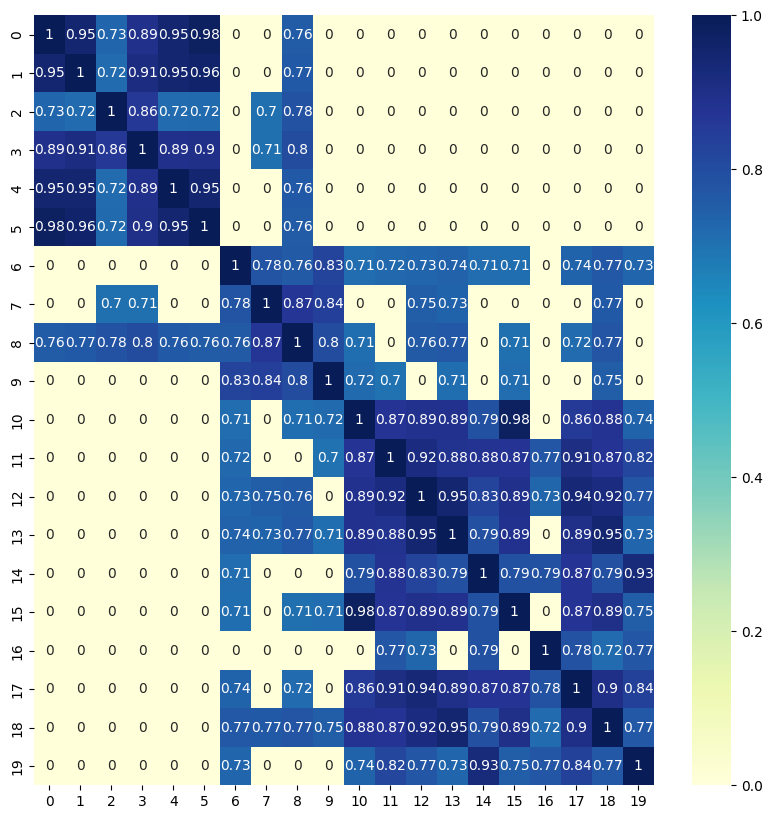

[ 0 ] import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())
[ 1 ] import pandas as pd
df = pd.read_csv('data.csv')
print(df.iloc[:5])
[ 2 ] import pandas as pd
df = pd.read_csv('data.csv')
for i, row in df.iterrows():
    if i < 5:
        print(row)
    else:
        break
[ 3 ] import pandas as pd
df = pd.read_csv('data.csv')
for row in df.values[:5]:
    print(row)
[ 4 ] import pandas as pd
df = pd.read_csv('data.csv')
print(df.query('index < 5'))
[ 5 ] import pandas as pd
df = pd.read_csv('data.csv')
print(df.describe())
[ 6 ] import pandas as pd
df = pd.read_csv('data.csv')
def summary_stats(data):
    return {
        'mean': data.mean(),
        'std': data.std(),
        'min': data.min(),
        '25%': data.quantile(0.25),
        '50%': data.median(),
        '75%': data.quantile(0.75),
        'max': data.max()
    }
print(df.apply(summary_stats))
[ 7 ] import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
print(np.mean(df), np.std(df), np.min(df),

In [42]:
# filter cosine similarities
cosine_similarities = cos
for x, sim in enumerate(cosine_similarities):
    for y, simm in enumerate(sim):
        if simm < .7:
            cosine_similarities[x][y] = 0
        # else:
        #     cosine_similarities[x][y] = simm - ((1-simm)/2)

# plot heatmap of cosine similarities
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cosine_similarities, annot=True, ax=plt.subplots(figsize=(10, 10))[1], cmap="YlGnBu")
plt.show()

for i, snippet in enumerate(list_all_snippets):
    print('[', i, ']', snippet)

In [60]:
source = ex_Environment_Exploratory_Data_Analysis

# Create the prompt with clear and explicit instructions
prompt = (
    "Based on the following Python code snippet, classify it into one or more of these classes: "
    "Environment, Data_Extraction, Exploratory_Data_Analysis, Data_Transform, Model_Train, "
    "Model_Evaluation, Model_Interpretation, Hyperparameter_Tuning, Visualization, Debug, Data_Export. "
    "Only output the class label(s) and nothing else.\n\n"
    f"\n{source}\n"
    "\n\nThe class label(s) is/are: "
)

# Set the EOS token as the padding token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize the input and generate attention masks
inputs = tokenizer(prompt, return_tensors='pt', padding=True)
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# Generate a response with attention masks and pad token ID
output = model.generate(
    input_ids,
    attention_mask=attention_mask,
    max_new_tokens=10,  # Restrict the response to be short
    pad_token_id=tokenizer.pad_token_id,
    do_sample=False  # Use deterministic output to get consistent results
)

# Decode the generated response
response = tokenizer.decode(output[0], skip_special_tokens=True)
print(response)
class_label = response.split("The class label(s) is/are:")[-1].strip()
print(class_label)

# very bad output


Based on the following Python code snippet, classify it into one or more of these classes: Environment, Data_Extraction, Exploratory_Data_Analysis, Data_Transform, Model_Train, Model_Evaluation, Model_Interpretation, Hyperparameter_Tuning, Visualization, Debug, Data_Export. Only output the class label(s) and nothing else.



    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    data = pd.read_csv("data.csv")
    corr = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True)



The class label(s) is/are: 

    Environment     
Environment


In [61]:
# The transformers library provides a utility function to manage the cache, allowing you to list and delete cached files.
from transformers import cached_file, TRANSFORMERS_CACHE
import shutil

# Get the cache directory path
cache_dir = TRANSFORMERS_CACHE
print(f"Cache directory: {cache_dir}")

# If you want to remove all cached models and tokenizers
shutil.rmtree(cache_dir)

ImportError: cannot import name 'cached_file' from 'transformers' (c:\Anaconda3\envs\ml_course\lib\site-packages\transformers\__init__.py)

In [20]:
import json

# Load the JSON file
name = 'd0005_a-comprehensive-guide-to-titanic-machine-learning.ipynb.json'
with open('data/data_Kaggle/processed/' + name, 'r') as f:
    data = json.load(f)

print(len(data["code_cells"]))
source = data["code_cells"][-13]['source']

# for key in data["code_cells"][-13].keys():
#     print(key, data["code_cells"][-13][key])

def get_embedding(cell, tokenizer, model, embedding_method, print_why=False):
    """
    Get the embedding of content and explain the prediction using SHAP values.

    :param content (str): the content to embed
    :param tokenizer: the tokenizer to use
    :param model: the model to use
    :param cell_index (int): the index of the cell

    :return embedding (torch.Tensor): the embedding of the content
    """

    source = cell.source
    mc_idx = cell.mc_idx    
    nb_idx = cell.nb_idx

    if not source or source == "" or source is None:
        print("Input content is empty, idx:", mc_idx) 

    source = source.replace("\n", " ") # Remove newlines
    source = source.replace("\t", " ") # Remove tabs
    source = source.strip() # Remove leading/trailing whitespaces
    if len(source) > 1024:
        print("Input content is too long, shorten to 1024 characters for nbidx, cidx:", nb_idx, mc_idx) 
        source = source[:1024] # Limit input to 1024 characters
    inputs = tokenizer(source, return_tensors="pt", padding=True, truncation=True, max_length=1024)

    try:
        outputs = model(**inputs)
    except:
        print("Model failed for cidx:", mc_idx)
        print("Input:", source)
        print("Inputs:", inputs)
        print("Length:", len(source))
        print("Tokenized length:", len(inputs['input_ids'][0]))
        print("Tokenized:", tokenizer.decode(inputs['input_ids'][0]))
        print("nb:", cell.nb_id)
        return None
    pooled_output = torch.mean(outputs.last_hidden_state, dim=1)

    return pooled_output

from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/unixcoder-base")
model = AutoModel.from_pretrained("microsoft/unixcoder-base")

vector = get_embedding(data["code_cells"][-13], tokenizer, model, "UniXcoder")



158
source """Base models for soft voting is the base models of hard voting."""
"""Initialize soft voting ensemble."""
baseModels = [rf, gbc, dt, knn, lr]
softVct = EnsembleVoteClassifier(clfs = baseModels, voting = "soft")
print("Fitting Soft Voting Ensemble...")
display(softVct.fit(xTrain, yTrain))
print("Done.")

"""Predict with soft voting ensemble."""
yPredSoftVct = pd.DataFrame(softVct.predict(xTest), columns = ["Soft_vct"])

"""Hard voting cross validation score."""
print("\nComputing Soft Voting X Val Score...")
softXValScore = cross_val_score(softVct, xTrain, yTrain, cv = 10, scoring = "accuracy")
softXValScore = round(softXValScore.mean()*100, 2)
print("Done.")

"""Compare hard voting score with best base models scores."""
softVsBaseScore = pd.DataFrame({"Soft_vs_base_score(%)": [softXValScore,
                                                          tunedScore["RF"],
                                                          tunedScore["GBC"], 
                              

AttributeError: 'dict' object has no attribute 'source'

In [11]:
import numpy as np
import random

sim1 = [0,1,2,3,4,5,6]
sim2 = [0,1,2,3,4,5,6,7,8,9]
sim3 = [0,1,2,3,4]

nb123 = np.asarray([sim1, sim2, sim3])
for nb_a in nb123:
    cell_a___nb_b_cell_b = []
    for cell_a in nb_a:
        # getemba
        nb_b_cell_b = []
        for nb_b in nb123:
            cell_b = []
            for cell_b in nb_b:
                #getembb
                sim_a_b_cell = random.uniform(0, 1) # random number between 0 and 1
                cell_b.append(sim_a_b_cell)


3


C:\Users\s169225\AppData\Local\Temp\ipykernel_16192\548311472.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  total_sim = np.asarray([sim1, sim2, sim3])


In [ ]:
class_keywords = {
    "Environment": {
        "PL_keywords": ["import", "requirements.txt", "environment.yml", "!pip install", "!conda install", "virtualenv", "venv", "docker-compose", "pip3 install", "conda install", "install.packages", "setup environment"],
        "NL_keywords": ["environment setup", "package installation", "dependency management", "virtual environment", "setup instructions", "installation guide", "libraries", "import packages", "import libraries"],
        "PL_keywords_weak": ["install", "setup.py", "pipenv", "pyenv", "sdk", "package.json", "Gemfile", "requirements", "dependency"],
        "NL_keywords_weak": ["setup environment", "installing dependencies", "manage packages", "setup guide", "configure", "environment configuration", "software installation", "installing software", "setup steps"],
        "PL_keywords_very_weak": ["import", "library", "package", "module", "install", "require", "setup.py", "pip install", "conda install", "importlib", "conda", "pip", "npm", "brew", "apt-get", "yum", "installing", "setting up", "configure", "setup", "environment", "dependencies", "packages", "library", "import", "install", "requirements", "setup.py", "requirements.txt", "environment.yml", "virtualenv", "venv", "docker-compose", "pip3 install", "conda install", "install.packages", "setup environment"], 
        "NL_keywords_very_weak": ["setup", "configuration", "dependencies", "environment setup", "install packages", "setup environment", "library versions", "dependency management", "environment setup", "package installation", "dependency management", "virtual environment", "setup instructions", "installation guide", "libraries", "import packages", "import libraries", "install", "setup.py", "pipenv", "pyenv", "sdk", "package.json", "Gemfile", "requirements", "dependency", "setup environment", "installing dependencies", "manage packages", "setup guide", "configure", "environment configuration", "software installation", "installing software", "setup steps"],
    },
    "Data_Extraction": {
        "PL_keywords": ["read_csv", "read_excel", "read_sql", "pd.read_", "BeautifulSoup", "scrapy.Spider", "API call", "load_dataset", "pd.read_json", "pd.read_html", "pd.read_"],
        "NL_keywords": ["data extraction", "extraction data", "data loading", "web scraping", "API request", "reading datasets", "data import", "load data", "load the data"],
        "PL_keywords_weak": ["fetch", "query", "open", "requests.get", "urllib.request", "pandasql", "read_table", "dataframe.read", "extract"],
        "NL_keywords_weak": ["getting data", "data retrieval", "fetching data", "data access", "collecting data", "data acquisition", "accessing web data", "downloading data", "importing data"],
        "PL_keywords_very_weak": ["read_csv", "read_excel", "load", "fetch", "API", "scrape", "DataFrame", "read_json", "pd.read_sql", "open", "requests.get", "read_sql", "pd.read_", "BeautifulSoup", "scrapy.Spider", "API call", "load_dataset", "pd.read_json", "pd.read_html", "pd.read_", "fetch", "query", "open", "requests.get", "urllib.request", "pandasql", "read_table", "dataframe.read", "extract"],
        "NL_keywords_very_weak": ["load data", "read data", "import data", "extract data", "source data", "retrieve data", "data acquisition", "fetch data", "API data", "data extraction", "extraction data", "data loading", "web scraping", "API request", "reading datasets", "data import", "load data", "load the data", "getting data", "data retrieval", "fetching data", "data access", "collecting data", "data acquisition", "accessing web data", "downloading data", "importing data"],
    },
    "Exploratory_Data_Analysis": {
        "PL_keywords": [".describe(", ".info(", "value_counts()", "df.isnull().sum", "sns.pairplot", ".corr", ".head(", ".tail("],
        "NL_keywords": ["exploratory data analysis", "data exploration", "exploration data", "data distribution", "missing values", "statistical summary", "initial observations", "data overview", "duplicates", "outliers"],
        "PL_keywords_weak": [".mean(", ".std(", ".plot(", ".histogram(", "plotly", "matplotlib", ".boxplot(", "scatter_matrix", "pairgrid", "distplot"],
        "NL_keywords_weak": ["data insights", "analyze data", "data trends", "data patterns", "visual analysis", "summary statistics", "data exploration", "analysis report", "data properties", "data characteristics", "data patterns", "data distribution", "data summary"],
        "PL_keywords_very_weak": ["head", "describe", "info", "histogram", "boxplot", ".boxplot(", "value_counts", "plt.show", "df.plot", "sns.pairplot", "sns.heatmap", "sns.countplot", "sns.distplot", "sns.scatterplot", "sns.lineplot", "sns.boxplot", "sns.violinplot", "sns.swarmplot", "sns.jointplot", "sns.lmplot", "sns.catplot", "sns.relplot", "sns.regplot", "sns.residplot", "sns.kdeplot", "sns.ecdfplot", "sns.barplot", "sns.pointplot", "sns.stripplot", "sns.boxenplot", "sns.violinplot", "sns.swarmplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatter", "sns.heatmap", "plt.boxplot", "fig, ax = plt.subplots", "plt.bar", ".hist(", ".plot(", ".scatter(", ".boxplot(", ".heatmap(", ".bar("],
        "NL_keywords_very_weak": ["summary statistics", "distribution", "data exploration", "initial analysis", "explore data", "data review", "first look", "data quality assessment", "data overview", "data summary", "data insights", "analyze data", "data trends", "data patterns", "visual analysis", "summary statistics", "data exploration", "analysis report", "data properties", "data characteristics", "data patterns", "data distribution", "data summary", "head", "describe", "info", "histogram", "boxplot", ".boxplot(", "value_counts", "plt.show", "df.plot", "sns.pairplot", "sns.heatmap", "sns.countplot", "sns.distplot", "sns.scatterplot", "sns.lineplot", "sns.boxplot", "sns.violinplot", "sns.swarmplot", "sns.jointplot", "sns.lmplot", "sns.catplot", "sns.relplot", "sns.regplot", "sns.residplot", "sns.kdeplot", "sns.ecdfplot", "sns.barplot", "sns.pointplot", "sns.stripplot", "sns.boxenplot", "sns.violinplot", "sns.swarmplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot"],
        "sci-kit-preprocessing": {"_label": [], "_function": [], "other": []},
        "sci-kit-feature-selection": {"_label": [], "_function": [], "other": []},
    },
    "Data_Transform": {
        "PL_keywords": [".merge(", ".join(", ".concat(", ".pivot(", ".groupby(", ".fillna(", ".dropna(", ".apply(", ".map(", ".replace(", ".to_datetime(", ".to_numeric("],
        "NL_keywords": ["data transformation", "transformation data", "data transforming", "transforming data", "data cleaning", "cleaning data", "feature engineering", "data manipulation", "transforming data", "data normalization", "data preprocessing", "data transformation"],
        "PL_keywords_weak": [".astype(", "pandas.get_dummies", ".cut(", ".qcut(", "DataFrameMapper", "ColumnTransformer", ".normalize(", ".standardize(", "MinMaxScaler", "LabelEncoder"],
        "NL_keywords_weak": ["altering data", "data adjustment", "modifying data", "data changes", "data conversion", "data format change", "data reshaping", "data restructuring", "data alteration"],
        "PL_keywords_very_weak": ["merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize"],
        "NL_keywords_very_weak": ["combine data", "transform data", "data manipulation", "clean data", "reshape data", "data cleaning", "restructure data", "data alignment", "data conversion", "data modification", "data adjustment", "data transformation", "data normalization", "data preprocessing", "data transformation", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder"],  
        "sci-kit-preprocessing": {"_label": [], "_function": [], "other": []},
        "sci-kit-feature-selection": {"_label": [], "_function": [], "other": []},
    },
    "Model_Train": {
        "PL_keywords": ["model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit("],
        "NL_keywords": ["model training", "training model", "model fitting", "learning algorithm", "supervised training", "model architecture"],
        "PL_keywords_weak": ["LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data"],
        "NL_keywords_weak": ["training algorithms", "learning models", "model development", "building model", "model creation", "learning from data", "training process", "model setup", "learning process"],
        "PL_keywords_very_weak": ["fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile"],
        "NL_keywords_very_weak": ["train model", "fit model", "model training", "supervised learning", "training phase", "learning process", "train classifier", "regression training", "classification training", "model fitting", "model training", "training model", "model fitting", "learning algorithm", "supervised training", "model architecture", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split"],
        "sci-kit-supervised": {"_label": [], "_function": [], "other": []},
        "sci-kit-unsupervised": {"_label": [], "_function": [], "other": []},
        "sci-kit-ensemble": {"_label": [], "_function": [], "other": []},
        "sci-kit-neural-networks": {"_label": [], "_function": [], "other": []},
    },
    "Model_Evaluation": {
        "PL_keywords": ["model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score"],
        "NL_keywords": ["evaluation model", "model evaluation", "model performance", "evaluation metrics", "accuracy measurement", "model testing", "validation results"],
        "PL_keywords_weak": [".score(", "mean_squared_error", "log_loss", ".predict(", "validation_split", "train_validation_test", "model_selection.cross_val_predict", "evaluate_model", "testing_model"],
        "NL_keywords_weak": ["evaluating accuracy", "performance analysis", "results analysis", "accuracy testing", "validation of model", "test performance", "assessment of model", "model quality", "evaluation process"],
        "PL_keywords_very_weak": ["score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy"],
        "NL_keywords_very_weak": ["model evaluation", "test model", "model performance", "accuracy of the model", "evaluate results", "performance metrics", "validation results", "testing phase", "model assessment", "model quality", "evaluation model", "model evaluation", "model performance", "evaluation metrics", "accuracy measurement", "model testing", "validation results", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix"],
        "sci-kit-evaluation-evaluate": {"_label": [], "_function": [], "other": []},
        "sci-kit-evaluation-scoring": {"_label": [], "_function": [], "other": []},
    },
    "Model_Interpretation": {
        "PL_keywords": ["feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance"],
        "NL_keywords": ["model interpretation", "interpretation model", "importance feature", "feature importance", "model insights", "interpretation techniques", "model explanation", "decision explanations"],
        "PL_keywords_weak": ["explain_model", "model_explainability", "FeatureImportance", "decision_path", "visualize_model", "interpret_model", "explain_predictions", "feature_contributions", "impact"],
        "NL_keywords_weak": ["understanding model", "model analysis", "explanation of predictions", "feature analysis", "model transparency", "interpretability techniques", "underlying patterns", "model rationale", "decision-making insight"],
        "PL_keywords_very_weak": ["feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_"],
        "NL_keywords_very_weak": ["interpret model", "model insights", "feature importance", "understand model", "model explanation", "explain predictions", "interpretation techniques", "model reasoning", "decision-making insight", "model interpretation", "interpretation model", "importance feature", "feature importance", "model insights", "interpretation techniques", "model explanation", "decision explanations", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot"],
        "sci-kit-evaluation": {"_label": [], "_function": [], "other": []},
        "sci-kit-feature-selection": {"_label": [], "_function": [], "other": []},
    },
    "Hyperparameter_Tuning": {
        "PL_keywords": ["GridSearchCV", "RandomizedSearchCV", "param_grid", "n_iter", "BayesianOptimization", "Optuna", "early_stopping", "hyperopt", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna"],
        "NL_keywords": ["hyperparameter tuning", "tune hyperparameters", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters"],
        "PL_keywords_weak": ["tune_model", "model_optimization", "search_parameters", "Hyperparameters", "parameter_search", "optimize_model", "adjust_parameters", "tuning_strategy", "optimization_process"],
        "NL_keywords_weak": ["adjusting model", "optimizing performance", "parameter adjustments", "fine-tuning models", "optimization of parameters", "model optimization", "tuning process", "optimization strategies", "parameter selection"],
        "PL_keywords_very_weak": ["GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin"],
        "NL_keywords_very_weak": ["tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters"],
        "sci-kit-module-selection": {"_label": [], "_function": [], "other": []},
    },
    "Visualization": {
        "PL_keywords": ["plt.plot", "df.hist", "sns.scatterplot", "sns.heatmap", "plt.boxplot", "fig, ax = plt.subplots", "plt.bar", ".hist(", ".plot(", ".scatter(", ".boxplot(", ".heatmap(", ".bar("],
        "NL_keywords": ["plot data", "data plotting", "visualization tools", "charts and graphs", "visual insights", "plotting data", "graphical representation", "data visualization"],
        "PL_keywords_weak": ["sns.", "seaborn.", "plotly.express", "matplotlib.pyplot", "seaborn.factorplot", "bokeh.plotting", "ggplot", "pyplot", "visualize", "chart", "graph"],
        "NL_keywords_weak": ["creating plots", "drawing graphs", "charting data", "visual representations", "data charts", "graphical plots", "visual analysis tools", "data graphics", "plot creation"],
        "PL_keywords_very_weak": ["plot", "show", "figure", "hist", "scatter", "bar", "lineplot", "plt.xlabel", "sns.heatmap", "plotly.graph_objs", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.subplots", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express"],
        "NL_keywords_very_weak": ["plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph"],
        "sci-kit-EDA": {"_label": [], "_function": [], "other": []},
    },
    "Debug": {
        "PL_keywords": ["assert", "try:", "except:", "pdb.set_trace", "logging.debug", "sys.exc_info"],
        "NL_keywords": ["debug", "error analysis", "troubleshooting steps", "debugging code", "error resolution", "problem solving", "code debugging", "error handling"],
        "PL_keywords_weak": ["debugger", "traceback", "exception", "error_log", "sys.tracebacklimit", "debug_mode", "stack_trace", "breakpoint", "error_report"],
        "NL_keywords_weak": ["finding errors", "code analysis", "fixing bugs", "problem identification", "error detection", "troubleshooting guide", "solving issues", "code inspection", "debugging steps"],
        "PL_keywords_very_weak": ["debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "break", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys"],
        "NL_keywords_very_weak": ["fix error", "debugging", "error handling", "troubleshoot", "resolve issues", "problem solving", "code correction", "error analysis", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:"],
    },
    "Data_Export": {
        "PL_keywords": [".to_csv(", ".to_excel(", ".to_sql(", ".to_json(", ".to_parquet(", "pickle.dump", "np.save"],
        "NL_keywords": ["data export", "export data", "data saving", "exporting results", "writing data", "output files", "saving tables"],
        "PL_keywords_weak": ["write", "to_hdf", "to_dict", "savefig", "to_markdown", "to_clipboard", "export", "save_data", "store"],
        "NL_keywords_weak": ["saving results", "data storage", "writing output", "export process", "result storage", "output generation", "saving process", "data archiving", "record saving"],
        "PL_keywords_very_weak": ["to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save"],
        "NL_keywords_very_weak": ["save data", "export data", "write file", "output data", "data output", "store results", "save results", "data preservation", "export analysis", "write data"],
    },
}


# Recursive function to get all submodules
def get_all_submodules(module):
    submodules = []
    for loader, module_name, is_pkg in pkgutil.walk_packages(module.__path__, module.__name__ + '.'):
        submodules.append(module_name)
    return submodules

# Function to get all classes and functions from a module
def get_all_classes_and_functions(module_name):
    classes = []
    functions = []
    try:
        module = __import__(module_name, fromlist=[''])
        for name, obj in inspect.getmembers(module):
            if inspect.isclass(obj) and obj.__module__ and obj.__module__.startswith('sklearn'):
                classes.append(obj.__module__ + '.' + name)
            elif inspect.isfunction(obj) and obj.__module__ and obj.__module__.startswith('sklearn'):
                functions.append(obj.__module__ + '.' + name)
    except ImportError:
        pass
    return classes, functions

# Helper function to format and store names
def format_and_store(names, storage_dict, prefix):
    for name in names:
        if name.startswith(prefix):
            stripped_name = name.replace(prefix, "")
            short_name = name.split(".")[-1]
            if "_label" in name or "label" in name:
                storage_dict["_label"].extend([short_name]) # .extend([stripped_name, short_name])
            elif "_function" in name or "function" in name:
                storage_dict["_function"].extend([short_name]) # .extend([stripped_name, short_name])
            else:
                if "other" not in storage_dict:
                    storage_dict["other"] = []
                storage_dict["other"].extend([short_name]) # .extend([stripped_name, short_name])

# Get all submodules in sklearn
submodules = get_all_submodules(sklearn)

# Populate the dictionary
for submodule_name in submodules:
    classes, functions = get_all_classes_and_functions(submodule_name)
    for class_name in classes:
        if "preprocessing" in class_name:
            format_and_store([class_name], class_keywords["Exploratory_Data_Analysis"]["sci-kit-preprocessing"], "sklearn.preprocessing.")
            format_and_store([class_name], class_keywords["Data_Transform"]["sci-kit-preprocessing"], "sklearn.preprocessing.")
        elif "feature_selection" in class_name:
            format_and_store([class_name], class_keywords["Exploratory_Data_Analysis"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
            format_and_store([class_name], class_keywords["Data_Transform"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
            format_and_store([class_name], class_keywords["Model_Interpretation"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
        elif "ensemble" in class_name:
            format_and_store([class_name], class_keywords["Model_Train"]["sci-kit-ensemble"], "sklearn.ensemble.")
        elif "neural_network" in class_name:
            format_and_store([class_name], class_keywords["Model_Train"]["sci-kit-neural-networks"], "sklearn.neural_network.")
        elif "evaluation" in class_name:
            format_and_store([class_name], class_keywords["Model_Evaluation"]["sci-kit-evaluation-evaluate"], "sklearn.evaluation.")
            format_and_store([class_name], class_keywords["Model_Interpretation"]["sci-kit-evaluation"], "sklearn.evaluation.")
        elif "model_selection" in class_name:
            format_and_store([class_name], class_keywords["Hyperparameter_Tuning"]["sci-kit-module-selection"], "sklearn.model_selection.")
        elif "supervised" in class_name:
            format_and_store([class_name], class_keywords["Model_Train"]["sci-kit-supervised"], "sklearn.supervised.")
        elif "unsupervised" in class_name:
            format_and_store([class_name], class_keywords["Model_Train"]["sci-kit-unsupervised"], "sklearn.unsupervised.")
    for function_name in functions:
        if "preprocessing" in function_name:
            format_and_store([function_name], class_keywords["Exploratory_Data_Analysis"]["sci-kit-preprocessing"], "sklearn.preprocessing.")
            format_and_store([function_name], class_keywords["Data_Transform"]["sci-kit-preprocessing"], "sklearn.preprocessing.")
        elif "feature_selection" in function_name:
            format_and_store([function_name], class_keywords["Exploratory_Data_Analysis"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
            format_and_store([function_name], class_keywords["Data_Transform"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
            format_and_store([function_name], class_keywords["Model_Interpretation"]["sci-kit-feature-selection"], "sklearn.feature_selection.")
        elif "ensemble" in function_name:
            format_and_store([function_name], class_keywords["Model_Train"]["sci-kit-ensemble"], "sklearn.ensemble.")
        elif "neural_network" in function_name:
            format_and_store([function_name], class_keywords["Model_Train"]["sci-kit-neural-networks"], "sklearn.neural_network.")
        elif "evaluation" in function_name:
            format_and_store([function_name], class_keywords["Model_Evaluation"]["sci-kit-evaluation-evaluate"], "sklearn.evaluation.")
            format_and_store([function_name], class_keywords["Model_Interpretation"]["sci-kit-evaluation"], "sklearn.evaluation.")
        elif "model_selection" in function_name:
            format_and_store([function_name], class_keywords["Hyperparameter_Tuning"]["sci-kit-module-selection"], "sklearn.model_selection.")
        elif "supervised" in function_name:
            format_and_store([function_name], class_keywords["Model_Train"]["sci-kit-supervised"], "sklearn.supervised.")
        elif "unsupervised" in function_name:
            format_and_store([function_name], class_keywords["Model_Train"]["sci-kit-unsupervised"], "sklearn.unsupervised.")

# Save to JSON
with open('class_keywords.json', 'w') as f:
    json.dump(class_keywords, f, indent=4)

print("Data saved to 'class_keywords.json'")


In [ ]:
## cell help function 2nd iter
def classify_cell_hardcoded(source, class_keywords, cell_type="markdown", cell_index=0, style="hardcoded_sklearn", print_why=False):
    """
    Classify a cell based on hardcoded keywords

    :param source (str): source of the cell
    :param class_keywords (dict): dictionary of keywords for each classification
    :param cell_type (str): type of the cell, 'markdown' or 'code'
    :param cell_index (int): index of the cell
    :param style (str): style of the classification, 'hardcoded' or 'hardcoded_sklearn' or 'hardcoded_strong'
    :param print_why (bool): print the reason why the cell was classified

    :return classification (str): classification of the cell
    :return process (str): process used to classify the cell
    :return detailed_scores (list): list of dictionaries with keyword occurrences and classifications
    """
    # empty cell
    if source is None:
        return "Uncategorized", "nothing", []
    if isinstance(source, list):
        source = "\n".join(source)
    source = source.lower()

    # Function to collect keywords based on cell type and style
    def collect_keywords(classification, details, cell_type):
        keywords = []
        if cell_type == "markdown":
            keywords.extend(details.get("NL_keywords_very_weak", []))
            keywords.extend(details.get("NL_keywords_weak", []))
            keywords.extend(details.get("NL_keywords", []))
        elif cell_type == "code":
            keywords.extend(details.get("PL_keywords_very_weak", []))
            keywords.extend(details.get("PL_keywords_weak", []))
            keywords.extend(details.get("PL_keywords", []))
            # Include sci-kit keywords for code cells
            for key in details:
                if key.startswith("sci-kit"):
                    keywords.extend(details.get(key, {}).get("_label", []))
                    keywords.extend(details.get(key, {}).get("_function", []))
                    keywords.extend(details.get(key, {}).get("other", []))
        return keywords

    # Collect keyword occurrences
    detailed_scores = {classification: {} for classification in class_keywords}
    class_scores = {}

    for classification, details in class_keywords.items():
        keywords = collect_keywords(classification, details, cell_type)
        score = sum(source.count(keyword) for keyword in keywords)
        class_scores[classification] = score
        for keyword in keywords:
            count = source.count(keyword)
            if count > 0:
                if keyword not in detailed_scores[classification]:
                    detailed_scores[classification][keyword] = 1
                else:
                    detailed_scores[classification][keyword] += 1
          
    # Determine the classification with the highest keyword count
    max_classification = max(class_scores, key=class_scores.get)
    max_score = class_scores[max_classification]

    if max_score > 0:
        if print_why:
            print(f"KEYWORD COUNT: Found {max_score} occurrences for {max_classification}")
        return max_classification, style, detailed_scores
    else:
        if print_why:
            print(f"No classification was found for CELL {cell_index}, so 'Uncategorized' it is...")
        return "Uncategorized", "nothing", detailed_scores
    
example_source1 = "This is a markdown cell with some text about data visualization and plotting. It also mentions seaborn and matplotlib."
cell_type1 = "markdown"

example_source2 = " import matplotlib.pyplot as plt\nplt.plot([1, 2, 3, 4])\nplt.ylabel('some numbers')\nplt.show()"
cell_type2 = "code"

classification1, process1, detailed_scores1 = classify_cell_hardcoded(example_source1, class_keywords, cell_type1, 1, style="hardcoded_sklearn", print_why=True)
classification2, process2, detailed_scores2 = classify_cell_hardcoded(example_source2, class_keywords, cell_type2, 2, style="hardcoded_sklearn", print_why=True)

print(f"Classification 1: {classification1}, Process 1: {process1}")
print(f"Detailed Scores 1: {detailed_scores1}")
print(f"Classification 2: {classification2}, Process 2: {process2}")
print(f"Detailed Scores 2: {detailed_scores2}")

In [15]:
    class_keywords = {
        "Environment": {

        },
        "Data_Extraction": {
            # dataset loading utilities (7)
        },
        "Exploratory_Data_Analysis": {
            "sci-kit-preprocessing": [],
            "sci-kit-EDA": [],
        },
        "Data_Transform": {
            "sci-kit-preprocessing": [],
            "sci-kit-feature-selection": [],
            # dataset transformations (6)
        },
        "Model_Train": {
            "sci-kit-supervised": [],
            "sci-kit-unsupervised": [],
            "sci-kit-ensemble": [],
            "sci-kit-neural-networks": [],
        },
        "Model_Evaluation": {
            "sci-kit-evaluation-evaluate": [],
            "sci-kit-evaluation-scoring": [],
        },
        "Model_Interpretation": {
            "sci-kit-feature-selection": [],
            # inspection (4)
        },
        "Hyperparameter_Tuning": {
            "sci-kit-module-selection": [],
        },
        "Visualization": {
            # visualization (5)
        },
        "Debug": {
            # computing with scikit-learn (8)
        },
        "Data_Export": {
        },
    }

['sklearn.preprocessing._data.Binarizer', 'sklearn.preprocessing._function_transformer.FunctionTransformer', 'sklearn.preprocessing._discretization.KBinsDiscretizer', 'sklearn.preprocessing._data.KernelCenterer', 'sklearn.preprocessing._label.LabelBinarizer', 'sklearn.preprocessing._label.LabelEncoder', 'sklearn.preprocessing._data.MaxAbsScaler', 'sklearn.preprocessing._data.MinMaxScaler', 'sklearn.preprocessing._label.MultiLabelBinarizer', 'sklearn.preprocessing._data.Normalizer', 'sklearn.preprocessing._encoders.OneHotEncoder', 'sklearn.preprocessing._encoders.OrdinalEncoder', 'sklearn.preprocessing._polynomial.PolynomialFeatures', 'sklearn.preprocessing._data.PowerTransformer', 'sklearn.preprocessing._data.QuantileTransformer', 'sklearn.preprocessing._data.RobustScaler', 'sklearn.preprocessing._polynomial.SplineTransformer', 'sklearn.preprocessing._data.StandardScaler']


In [46]:
import pkgutil
import inspect

import sklearn 


# more general formules to get all submodules, classes and functions of a module
def get_all_submodules(module):
    """
    Function to get all submodules of a module using pkgutil.walk_packages.
    To get the sci-kit learn submodules for example, pass sklearn as the module.

    :param module (module): module to get submodules from

    :return (list): of submodules
    """
    submodules = []
    for loader, module_name, is_pkg in pkgutil.walk_packages(module.__path__, module.__name__ + '.'):
        submodules.append(module_name)
    return submodules

def get_all_classes_and_functions(module_name):
    """
    Function to get all classes and functions from a module.
    To get the sci-kit learn classes and functions for example, pass sklearn as the module_name.

    :param module_name (str): name of the module to get classes and functions from

    :return (list, list): of classes and functions
    """
    classes = []
    functions = []
    try:
        module = __import__(module_name, fromlist=[''])
        for name, obj in inspect.getmembers(module):
            if inspect.isclass(obj) and obj.__module__ and obj.__module__.startswith(module_name):
                classes.append(obj.__module__ + '.' + name)
            elif inspect.isfunction(obj) and obj.__module__ and obj.__module__.startswith(module_name):
                functions.append(obj.__module__ + '.' + name)
    except ImportError:
        pass
    return classes, functions
    # obj.__module__.startswith('sklearn') --> check if module starts with 'sklearn'

# Get all submodules in sklearn
possible_classes = ["Environment", "Data_Extraction", "Exploratory_Data_Analysis", "Data_Transform","Model_Train","Model_Evaluation","Model_Interpretation","Hyperparameter_Tuning","Visualization","Debug","Data_Export", "Other"]
sklearn_keywords = {}
for clas in possible_classes:
    sklearn_keywords[clas] = {}

print(f'The empty sklearn_keywords dictionary: {sklearn_keywords}')

# get initial submodules 
submodules = get_all_submodules(sklearn)

all_second_names = []
second_names = []
for i, submodule in enumerate(submodules):
    first_name = submodule.split(".")[1]
    first_name_same = True

    classes, functions = get_all_classes_and_functions(submodule)
    # check if first name is the same as the next one, then continue
    if i < len(submodules) - 1:
        if submodules[i+1].split(".")[1] == first_name:
            second_names.append(submodule)
            continue

    print('SUBMODULE: ', first_name)
    print('_classes:', classes[:5])
    print('_functions:', functions[:5])
    # add to dictionary
    # if first_name ==    'utils':
    # elif first_name ==  'inspection':
    # elif first_name ==  'neural_network':



#     all_second_names.extend(second_names)

# print(len(all_second_names))
# print(len(set(all_second_names)))
# print(set(all_second_names))

# print('\n\n--\n\n')

def hide():
    # print("---------------------------------------------------------------------------------")

    # # Get all classes and functions from a submodule
    # classes, functions = get_all_classes_and_functions("sklearn.preprocessing")
    # print(classes)
    # print(functions)

    # print("---------------------------------------------------------------------------------")

    # print(" set of similarities ", set(classes) & set(functions))

    # print("---------------------------------------------------------------------------------")

    # # check if "preprocessing" occurs in submodules
    # for submodule_name in submodules:
    #     if "preprocessing" in submodule_name:
    #         print("YEST IT DOES", submodule_name)
    None

The empty sklearn_keywords dictionary: {'Environment': {}, 'Data_Extraction': {}, 'Exploratory_Data_Analysis': {}, 'Data_Transform': {}, 'Model_Train': {}, 'Model_Evaluation': {}, 'Model_Interpretation': {}, 'Hyperparameter_Tuning': {}, 'Visualization': {}, 'Debug': {}, 'Data_Export': {}, 'Other': {}}


In [30]:
# script to classifiy all submodules
print(len(submodules))
second_names = []
remove_list = []

for i, submodule in enumerate(submodules):
    first_name = submodule.split(".")[1]
    first_name_same = True
    
    # check if first name is the same as the next one, then continue
    if submodules[i+1].split(".")[1] == first_name:
        second_names.append(submodule)
        continue

    # class name chosen for submodule group
    answer = 'n'
    while answer == 'n':
        for class_name in possible_classes:
            print(f"Is {first_name} <- part of: {class_name}?")
            answer = input()
            if answer == 'y' or answer == 'o' or answer == 'end':
                break
        break
    if answer == 'n' or answer == 'o':
        class_name = 'Other' # choose "Other" class if no class was selected

    if answer == 'end':
        submodules = [i for i in submodules if i not in remove_list]
        break
        break

    # extend classnames with second_names
    sklearn_keywords[class_name]["sklearn"].extend(second_names)

    # reset second_names
    second_names = []

    # remove second_names from submodules
    remove_list.extend(second_names)

    print('                      ', class_name, ' now contains ', submodule)

print(f"{len(remove_list)} submodules were removed. Length of submodules: {len(submodules)}")

# export sklearn_keywords to json
import json
with open('sklearn_keywords.json', 'w') as f:
    json.dump(sklearn_keywords, f, indent=4)

print("Data saved to 'sklearn_keywords.json'")

600
Is __check_build <- part of: Environment?


Is __check_build <- part of: Data_Extraction?
Is __check_build <- part of: Exploratory_Data_Analysis?
Is __check_build <- part of: Data_Transform?
Is __check_build <- part of: Model_Train?
Is __check_build <- part of: Model_Evaluation?
Is __check_build <- part of: Model_Interpretation?
Is __check_build <- part of: Hyperparameter_Tuning?
Is __check_build <- part of: Visualization?
Is __check_build <- part of: Debug?
Is __check_build <- part of: Data_Export?
Is __check_build <- part of: Other?
                       Other  now contains  sklearn.__check_build._check_build
Is _build_utils <- part of: Environment?
Is _build_utils <- part of: Data_Extraction?
Is _build_utils <- part of: Exploratory_Data_Analysis?
Is _build_utils <- part of: Data_Transform?
Is _build_utils <- part of: Model_Train?
Is _build_utils <- part of: Model_Evaluation?
Is _build_utils <- part of: Model_Interpretation?
Is _build_utils <- part of: Hyperparameter_Tuning?
Is _build_utils <- part of: Visualization?
Is _buil

KeyboardInterrupt: Interrupted by user

In [71]:
# Get all submodules in numpy
import numpy
import pandas
import tensorflow
import torch

possible_classes = ["Environment", "Data_Extraction", "Exploratory_Data_Analysis", "Data_Transform","Model_Train","Model_Evaluation","Model_Interpretation","Hyperparameter_Tuning","Visualization","Debug","Data_Export", "Other"]
keywords = {}
for clas in possible_classes:
    keywords[clas] = {"pytorch": []}

print(f'The empty keywords dictionary: {keywords}')

# get initial submodules 
submodules = get_all_submodules(torch)

all_second_names = []
second_names = []
for i, submodule in enumerate(submodules):
    first_name = submodule.split(".")[1]
    first_name_same = True

    try:
        classes, functions = get_all_classes_and_functions(submodule)
    except:
        continue
        
    # check if first name is the same as the next one, then continue
    if i < len(submodules) - 1:
        if submodules[i+1].split(".")[1] == first_name:
            second_names.append(submodule)
            continue

    print('SUBMODULE: ', first_name)
    print('_classes:', classes[:5])
    print('_functions:', functions[:5])

def hide():
    # submodules = get_all_submodules(np)
    # all_subm = []

    # for submodule in submodules:
    #     strip_name = submodule.split(".")[1]
    #     if len(submodule.split(".")) > 2:
    #         strip_name = submodule.split(".")[2]
    #     print("SUBMODULE: ", submodule, "     (strip_name: ", strip_name, ")")
    #     try:
    #         classes, functions = get_all_classes_and_functions(submodule)
    #     except:
    #         classes = []
    #         functions = []
    #     print("classes: ", classes)
    #     print("functions: ", functions)
    #     all_subm.append(strip_name)

    # print("length: ", len(all_subm))
    # print("set length: ", len(set(all_subm)))
    # print("set: ", set(all_subm))
    None


The empty keywords dictionary: {'Environment': {'pytorch': []}, 'Data_Extraction': {'pytorch': []}, 'Exploratory_Data_Analysis': {'pytorch': []}, 'Data_Transform': {'pytorch': []}, 'Model_Train': {'pytorch': []}, 'Model_Evaluation': {'pytorch': []}, 'Model_Interpretation': {'pytorch': []}, 'Hyperparameter_Tuning': {'pytorch': []}, 'Visualization': {'pytorch': []}, 'Debug': {'pytorch': []}, 'Data_Export': {'pytorch': []}, 'Other': {'pytorch': []}}


c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\_shard\checkpoint\__init__.py:8: DeprecationWarning: torch.distributed._shard.checkpoint will be deprecated, use torch.distributed.checkpoint instead
  warnings.warn(
c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\_sharded_tensor\__init__.py:8: DeprecationWarning: torch.distributed._sharded_tensor will be deprecated, use torch.distributed._shard.sharded_tensor instead
  warnings.warn(
c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\_sharding_spec\__init__.py:8: DeprecationWarning: torch.distributed._sharding_spec will be deprecated, use torch.distributed._shard.sharding_spec instead
  warnings.warn(
[2024-07-30 14:07:12,395] torch.distributed.elastic.multiprocessing.redirects: [WARNING] NOTE: Redirects are currently not supported in Windows or MacOs.


SUBMODULE:  _C
_classes: ['torch._C.DisableTorchFunction', 'torch._C.DisableTorchFunctionSubclass', 'torch._C.Generator', 'torch._C.LoggerBase', 'torch._C.StorageBase']
_functions: []
SUBMODULE:  _VF
_classes: []
_functions: []
SUBMODULE:  __config__
_classes: []
_functions: ['torch.__config__._cxx_flags', 'torch.__config__.parallel_info', 'torch.__config__.show']
SUBMODULE:  __future__
_classes: []
_functions: ['torch.__future__.get_overwrite_module_params_on_conversion', 'torch.__future__.set_overwrite_module_params_on_conversion']
SUBMODULE:  _appdirs
_classes: ['torch._appdirs.AppDirs']
_functions: ['torch._appdirs._get_win_folder', 'torch._appdirs._get_win_folder_from_registry', 'torch._appdirs._get_win_folder_with_ctypes', 'torch._appdirs._get_win_folder_with_jna', 'torch._appdirs._get_win_folder_with_pywin32']
SUBMODULE:  _awaits
_classes: ['torch._awaits._PyAwaitMeta']
_functions: []
SUBMODULE:  _classes
_classes: ['torch._classes._ClassNamespace', 'torch._classes._Classes']
_f

c:\Anaconda3\envs\ml_course\lib\site-packages\torch\_functorch\pytree_hacks.py:18: DeprecationWarning: torch._functorch.pytree_hacks is deprecated and will be removed in a future release. Please use torch.utils._pytree instead.
  warnings.warn(


SUBMODULE:  _inductor
_classes: ['torch._inductor.wrapper_benchmark.ProfileEvent']
_functions: ['torch._inductor.wrapper_benchmark.benchmark_all_kernels', 'torch._inductor.wrapper_benchmark.compiled_module_main', 'torch._inductor.wrapper_benchmark.get_kernel_category', 'torch._inductor.wrapper_benchmark.get_kernel_category_by_source_code', 'torch._inductor.wrapper_benchmark.parse_profile_event_list']
SUBMODULE:  _jit_internal
_classes: ['torch._jit_internal.BroadcastingListCls', 'torch._jit_internal.FunctionModifiers', 'torch._jit_internal.SourceLoader', 'torch._jit_internal._IgnoreContextManager', 'torch._jit_internal._TensorExtractor']
_functions: ['torch._jit_internal._check_overload_body', 'torch._jit_internal._clear_fn_overloads', 'torch._jit_internal._copy_to_script_wrapper', 'torch._jit_internal._create_named_tuple', 'torch._jit_internal._disable_emit_hooks']
SUBMODULE:  _lazy
_classes: []
_functions: ['torch._lazy.ts_backend.init']
SUBMODULE:  _library
_classes: ['torch._librar

c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\distributed_c10d.py:359: UserWarning: torch.distributed.reduce_op is deprecated, please use torch.distributed.ReduceOp instead
  warnings.warn(
[2024-07-30 14:07:15,295] torch.distributed._tensor._xla: [WARNING] No module named 'torch_xla'


SUBMODULE:  distributed
_classes: []
_functions: ['torch.distributed.utils._alloc_storage', 'torch.distributed.utils._apply_to_tensors', 'torch.distributed.utils._cast_forward_inputs', 'torch.distributed.utils._free_storage', 'torch.distributed.utils._p_assert']
SUBMODULE:  distributions
_classes: ['torch.distributions.wishart.Wishart']
_functions: ['torch.distributions.wishart._clamp_above_eps', 'torch.distributions.wishart._mvdigamma']
SUBMODULE:  export
_classes: ['torch.export.graph_signature.ConstantArgument', 'torch.export.graph_signature.ExportBackwardSignature', 'torch.export.graph_signature.ExportGraphSignature', 'torch.export.graph_signature.InputKind', 'torch.export.graph_signature.InputSpec']
_functions: ['torch.export.graph_signature._sig_to_specs']
SUBMODULE:  fft
_classes: []
_functions: []
SUBMODULE:  func
_classes: []
_functions: ['torch.func.functional_call', 'torch.func.functionalize', 'torch.func.grad', 'torch.func.grad_and_value', 'torch.func.hessian']
SUBMODULE:  

c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\distributed_c10d.py:260: UserWarning: Device capability of mock_process_group unspecified, assuming `cpu` and `cuda`. Please specify it via the `devices` argument of `register_backend`.
  warnings.warn(
c:\Anaconda3\envs\ml_course\lib\site-packages\torch\distributed\distributed_c10d.py:260: UserWarning: Device capability of threaded unspecified, assuming `cpu` and `cuda`. Please specify it via the `devices` argument of `register_backend`.
  warnings.warn(


SUBMODULE:  testing
_classes: ['torch.testing._internal.two_tensor.TwoTensor', 'torch.testing._internal.two_tensor.TwoTensorMode']
_functions: []
SUBMODULE:  torch_version
_classes: ['torch.torch_version.TorchVersion']
_functions: []
SUBMODULE:  types
_classes: ['torch.types.Storage']
_functions: []
SUBMODULE:  utils
_classes: ['torch.utils.weak.TensorWeakRef', 'torch.utils.weak.WeakIdKeyDictionary', 'torch.utils.weak.WeakIdRef', 'torch.utils.weak.WeakTensorKeyDictionary']
_functions: []
SUBMODULE:  version
_classes: []
_functions: []


usage: ipykernel_launcher.py [-h] [--style {json,html}] [--title TITLE] model
ipykernel_launcher.py: error: the following arguments are required: model


In [72]:
def hello():
    return "hello", "world"

helloo,_ = hello()

print(helloo)

hello


In [89]:
def hardcoded_keywords():
    """
    Function to populate a dictionary with hardcoded keywords based on their functionality.

    :return (dict): dictionary with hardcoded keywords
    """

    hardcoded_keywords = {
        "Environment": {
            "PL_keywords": ["import", "requirements.txt", "environment.yml", "!pip install", "!conda install", "virtualenv", "venv", "docker-compose", "pip3 install", "conda install", "install.packages", "setup environment"],
            "NL_keywords": ["environment setup", "package installation", "dependency management", "virtual environment", "setup instructions", "installation guide", "libraries", "import packages", "import libraries"],
            "PL_keywords_weak": ["install", "setup.py", "pipenv", "pyenv", "sdk", "package.json", "Gemfile", "requirements", "dependency"],
            "NL_keywords_weak": ["setup environment", "installing dependencies", "manage packages", "setup guide", "configure", "environment configuration", "software installation", "installing software", "setup steps"],
            "PL_keywords_very_weak": ["import", "library", "package", "module", "install", "require", "setup.py", "pip install", "conda install", "importlib", "conda", "pip", "npm", "brew", "apt-get", "yum", "installing", "setting up", "configure", "setup", "environment", "dependencies", "packages", "library", "import", "install", "requirements", "setup.py", "requirements.txt", "environment.yml", "virtualenv", "venv", "docker-compose", "pip3 install", "conda install", "install.packages", "setup environment"], 
            "NL_keywords_very_weak": ["setup", "configuration", "dependencies", "environment setup", "install packages", "setup environment", "library versions", "dependency management", "environment setup", "package installation", "dependency management", "virtual environment", "setup instructions", "installation guide", "libraries", "import packages", "import libraries", "install", "setup.py", "pipenv", "pyenv", "sdk", "package.json", "Gemfile", "requirements", "dependency", "setup environment", "installing dependencies", "manage packages", "setup guide", "configure", "environment configuration", "software installation", "installing software", "setup steps"],
        
        },
        "Data_Extraction": {
            "PL_keywords": ["read_csv", "read_excel", "read_sql", "pd.read_", "BeautifulSoup", "scrapy.Spider", "API call", "load_dataset", "pd.read_json", "pd.read_html", "pd.read_"],
            "NL_keywords": ["data extraction", "extraction data", "data loading", "web scraping", "API request", "reading datasets", "data import", "load data", "load the data"],
            "PL_keywords_weak": ["fetch", "query", "open", "requests.get", "urllib.request", "pandasql", "read_table", "dataframe.read", "extract"],
            "NL_keywords_weak": ["getting data", "data retrieval", "fetching data", "data access", "collecting data", "data acquisition", "accessing web data", "downloading data", "importing data"],
            "PL_keywords_very_weak": ["read_csv", "read_excel", "load", "fetch", "API", "scrape", "DataFrame", "read_json", "pd.read_sql", "open", "requests.get", "read_sql", "pd.read_", "BeautifulSoup", "scrapy.Spider", "API call", "load_dataset", "pd.read_json", "pd.read_html", "pd.read_", "fetch", "query", "open", "requests.get", "urllib.request", "pandasql", "read_table", "dataframe.read", "extract"],
            "NL_keywords_very_weak": ["load data", "read data", "import data", "extract data", "source data", "retrieve data", "data acquisition", "fetch data", "API data", "data extraction", "extraction data", "data loading", "web scraping", "API request", "reading datasets", "data import", "load data", "load the data", "getting data", "data retrieval", "fetching data", "data access", "collecting data", "data acquisition", "accessing web data", "downloading data", "importing data"],
        },
        "Exploratory_Data_Analysis": {
            "PL_keywords": [".describe(", ".info(", "value_counts()", "df.isnull().sum", "sns.pairplot", ".corr", ".head(", ".tail("],
            "NL_keywords": ["exploratory data analysis", "data exploration", "exploration data", "data distribution", "missing values", "statistical summary", "initial observations", "data overview", "duplicates", "outliers"],
            "PL_keywords_weak": [".mean(", ".std(", ".plot(", ".histogram(", "plotly", "matplotlib", ".boxplot(", "scatter_matrix", "pairgrid", "distplot"],
            "NL_keywords_weak": ["data insights", "analyze data", "data trends", "data patterns", "visual analysis", "summary statistics", "data exploration", "analysis report", "data properties", "data characteristics", "data patterns", "data distribution", "data summary"],
            "PL_keywords_very_weak": ["head", "describe", "info", "histogram", "boxplot", ".boxplot(", "value_counts", "plt.show", "df.plot", "sns.pairplot", "sns.heatmap", "sns.countplot", "sns.distplot", "sns.scatterplot", "sns.lineplot", "sns.boxplot", "sns.violinplot", "sns.swarmplot", "sns.jointplot", "sns.lmplot", "sns.catplot", "sns.relplot", "sns.regplot", "sns.residplot", "sns.kdeplot", "sns.ecdfplot", "sns.barplot", "sns.pointplot", "sns.stripplot", "sns.boxenplot", "sns.violinplot", "sns.swarmplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatter", "sns.heatmap", "plt.boxplot", "fig, ax = plt.subplots", "plt.bar", ".hist(", ".plot(", ".scatter(", ".boxplot(", ".heatmap(", ".bar("],
            "NL_keywords_very_weak": ["summary statistics", "distribution", "data exploration", "initial analysis", "explore data", "data review", "first look", "data quality assessment", "data overview", "data summary", "data insights", "analyze data", "data trends", "data patterns", "visual analysis", "summary statistics", "data exploration", "analysis report", "data properties", "data characteristics", "data patterns", "data distribution", "data summary", "head", "describe", "info", "histogram", "boxplot", ".boxplot(", "value_counts", "plt.show", "df.plot", "sns.pairplot", "sns.heatmap", "sns.countplot", "sns.distplot", "sns.scatterplot", "sns.lineplot", "sns.boxplot", "sns.violinplot", "sns.swarmplot", "sns.jointplot", "sns.lmplot", "sns.catplot", "sns.relplot", "sns.regplot", "sns.residplot", "sns.kdeplot", "sns.ecdfplot", "sns.barplot", "sns.pointplot", "sns.stripplot", "sns.boxenplot", "sns.violinplot", "sns.swarmplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot", "sns.relplot", "sns.scatterplot", "sns.lineplot", "sns.histplot", "sns.kdeplot", "sns.ecdfplot", "sns.rugplot", "sns.barplot", "sns.countplot", "sns.pointplot", "sns.violinplot", "sns.boxenplot", "sns.stripplot", "sns.swarmplot", "sns.violinplot", "sns.catplot", "sns.pairplot", "sns.jointplot", "sns.lmplot"],
        },
        "Data_Transform": {
            "PL_keywords": [".merge(", ".join(", ".concat(", ".pivot(", ".groupby(", ".fillna(", ".dropna(", ".apply(", ".map(", ".replace(", ".to_datetime(", ".to_numeric("],
            "NL_keywords": ["data transformation", "transformation data", "data transforming", "transforming data", "data cleaning", "cleaning data", "feature engineering", "data manipulation", "transforming data", "data normalization", "data preprocessing", "data transformation"],
            "PL_keywords_weak": [".astype(", "pandas.get_dummies", ".cut(", ".qcut(", "DataFrameMapper", "ColumnTransformer", ".normalize(", ".standardize(", "MinMaxScaler", "LabelEncoder"],
            "NL_keywords_weak": ["altering data", "data adjustment", "modifying data", "data changes", "data conversion", "data format change", "data reshaping", "data restructuring", "data alteration"],
            "PL_keywords_very_weak": ["merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize"],
            "NL_keywords_very_weak": ["combine data", "transform data", "data manipulation", "clean data", "reshape data", "data cleaning", "restructure data", "data alignment", "data conversion", "data modification", "data adjustment", "data transformation", "data normalization", "data preprocessing", "data transformation", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder", "merge", "join", "concatenate", "groupby", "pivot", "filter", "map", "df.apply", "replace", "pd.melt", "pd.pivot_table", "pd.concat", "pd.merge", "pd.join", "pd.groupby", "pd.fillna", "pd.dropna", "pd.apply", "pd.map", "pd.replace", "pd.to_datetime", "pd.to_numeric", "astype", "pandas.get_dummies", "cut", "qcut", "DataFrameMapper", "ColumnTransformer", "normalize", "standardize", "MinMaxScaler", "LabelEncoder"],  
        },
        "Model_Train": {
            "PL_keywords": ["model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit("],
            "NL_keywords": ["model training", "training model", "model fitting", "learning algorithm", "supervised training", "model architecture"],
            "PL_keywords_weak": ["LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data"],
            "NL_keywords_weak": ["training algorithms", "learning models", "model development", "building model", "model creation", "learning from data", "training process", "model setup", "learning process"],
            "PL_keywords_very_weak": ["fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile"],
            "NL_keywords_very_weak": ["train model", "fit model", "model training", "supervised learning", "training phase", "learning process", "train classifier", "regression training", "classification training", "model fitting", "model training", "training model", "model fitting", "learning algorithm", "supervised training", "model architecture", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split", "cross_validate", "Sequential(", "estimator.fit", "compile", ".fit(", "LinearRegression", "RandomForestClassifier", "KMeans", ".train(", "fit_transform", "model_selection", "pipeline.Pipeline", "models.compile", "training_data", "fit", "train", "model", "regressor", "classifier", "predict", ".fit(", "sklearn.model_selection", "train_test_split", "xgboost.train", "model.fit", "train_test_split"],

        },
        "Model_Evaluation": {
            "PL_keywords": ["model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score"],
            "NL_keywords": ["evaluation model", "model evaluation", "model performance", "evaluation metrics", "accuracy measurement", "model testing", "validation results"],
            "PL_keywords_weak": [".score(", "mean_squared_error", "log_loss", ".predict(", "validation_split", "train_validation_test", "model_selection.cross_val_predict", "evaluate_model", "testing_model"],
            "NL_keywords_weak": ["evaluating accuracy", "performance analysis", "results analysis", "accuracy testing", "validation of model", "test performance", "assessment of model", "model quality", "evaluation process"],
            "PL_keywords_very_weak": ["score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy"],
            "NL_keywords_very_weak": ["model evaluation", "test model", "model performance", "accuracy of the model", "evaluate results", "performance metrics", "validation results", "testing phase", "model assessment", "model quality", "evaluation model", "model evaluation", "model performance", "evaluation metrics", "accuracy measurement", "model testing", "validation results", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix", ".predict(", "model.evaluate", "confusion_matrix", "accuracy_score", "precision_score", "recall_score", "f1_score", ".evluate(", "precision", "recall", "f1_score", "roc_auc_score", "classification_report", "cross_val_score", "evaluate", "test", "validation", "accuracy", "precision", "recall", "f1_score", "confusion_matrix"],
        },
        "Model_Interpretation": {
            "PL_keywords": ["feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance"],
            "NL_keywords": ["model interpretation", "interpretation model", "importance feature", "feature importance", "model insights", "interpretation techniques", "model explanation", "decision explanations"],
            "PL_keywords_weak": ["explain_model", "model_explainability", "FeatureImportance", "decision_path", "visualize_model", "interpret_model", "explain_predictions", "feature_contributions", "impact"],
            "NL_keywords_weak": ["understanding model", "model analysis", "explanation of predictions", "feature analysis", "model transparency", "interpretability techniques", "underlying patterns", "model rationale", "decision-making insight"],
            "PL_keywords_very_weak": ["feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_", "decision_function", "partial_dependence", "shap_values", "eli5.show_weights", "interpret_model", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importance_", "coef_"],
            "NL_keywords_very_weak": ["interpret model", "model insights", "feature importance", "understand model", "model explanation", "explain predictions", "interpretation techniques", "model reasoning", "decision-making insight", "model interpretation", "interpretation model", "importance feature", "feature importance", "model insights", "interpretation techniques", "model explanation", "decision explanations", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot", "eli5.show_weights", "LIME", "SHAP", "PermutationImportance", "plot_importance", "plot_partial_dependence", "plot_pdp", "plot_shap", "plot_lime", "plot_permutation_importance", "feature_importances_", "shap_values", "plot_tree", "partial_dependence_plot"],
        },
        "Hyperparameter_Tuning": {
            "PL_keywords": ["GridSearchCV", "RandomizedSearchCV", "param_grid", "n_iter", "BayesianOptimization", "Optuna", "early_stopping", "hyperopt", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna"],
            "NL_keywords": ["hyperparameter tuning", "tune hyperparameters", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters"],
            "PL_keywords_weak": ["tune_model", "model_optimization", "search_parameters", "Hyperparameters", "parameter_search", "optimize_model", "adjust_parameters", "tuning_strategy", "optimization_process"],
            "NL_keywords_weak": ["adjusting model", "optimizing performance", "parameter adjustments", "fine-tuning models", "optimization of parameters", "model optimization", "tuning process", "optimization strategies", "parameter selection"],
            "PL_keywords_very_weak": ["GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin", "BayesianOptimization", "model_selection", "tune.run", "tune_grid", "tune_random", "tune_bayesian", "tune_optuna", "GridSearchCV", "RandomizedSearchCV", "cross_val_score", "param_grid", "hyperopt.fmin"],
            "NL_keywords_very_weak": ["tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters", "tune parameters", "hyperparameter optimization", "parameter search", "optimize model", "tuning strategy", "optimize performance", "search strategy", "parameter optimization", "model tuning", "search strategy", "optimization techniques", "tuning parameters"],
        },
        "Visualization": {
            "PL_keywords": ["plt.plot", "df.hist", "sns.scatterplot", "sns.heatmap", "plt.boxplot", "fig, ax = plt.subplots", "plt.bar", ".hist(", ".plot(", ".scatter(", ".boxplot(", ".heatmap(", ".bar("],
            "NL_keywords": ["plot data", "data plotting", "visualization tools", "charts and graphs", "visual insights", "plotting data", "graphical representation", "data visualization"],
            "PL_keywords_weak": ["sns.", "seaborn.", "plotly.express", "matplotlib.pyplot", "seaborn.factorplot", "bokeh.plotting", "ggplot", "pyplot", "visualize", "chart", "graph"],
            "NL_keywords_weak": ["creating plots", "drawing graphs", "charting data", "visual representations", "data charts", "graphical plots", "visual analysis tools", "data graphics", "plot creation"],
            "PL_keywords_very_weak": ["plot", "show", "figure", "hist", "scatter", "bar", "lineplot", "plt.xlabel", "sns.heatmap", "plotly.graph_objs", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.subplots", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express", "plotly.offline", "plotly.graph_objs", "plotly.express", "plotly.offline", "plotly.subplots", "plotly.express"],
            "NL_keywords_very_weak": ["plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph", "data visualization", "show data", "illustrate data", "visualization techniques", "chart analysis", "graphical representation", "plot data", "visualize", "chart", "graph"],
        },
        "Debug": {
            "PL_keywords": ["assert", "try:", "except:", "pdb.set_trace", "logging.debug", "sys.exc_info"],
            "NL_keywords": ["debug", "error analysis", "troubleshooting steps", "debugging code", "error resolution", "problem solving", "code debugging", "error handling"],
            "PL_keywords_weak": ["debugger", "traceback", "exception", "error_log", "sys.tracebacklimit", "debug_mode", "stack_trace", "breakpoint", "error_report"],
            "NL_keywords_weak": ["finding errors", "code analysis", "fixing bugs", "problem identification", "error detection", "troubleshooting guide", "solving issues", "code inspection", "debugging steps"],
            "PL_keywords_very_weak": ["debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "break", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "debug", "error", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys"],
            "NL_keywords_very_weak": ["fix error", "debugging", "error handling", "troubleshoot", "resolve issues", "problem solving", "code correction", "error analysis", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:", "except:", "pdb.set_trace()", "logging.debug", "sys.exc_info", "error", "debug", "exception", "traceback", "breakpoint", "assert", "try:"],
        },
        "Data_Export": {
            "PL_keywords": [".to_csv(", ".to_excel(", ".to_sql(", ".to_json(", ".to_parquet(", "pickle.dump", "np.save"],
            "NL_keywords": ["data export", "export data", "data saving", "exporting results", "writing data", "output files", "saving tables"],
            "PL_keywords_weak": ["write", "to_hdf", "to_dict", "savefig", "to_markdown", "to_clipboard", "export", "save_data", "store"],
            "NL_keywords_weak": ["saving results", "data storage", "writing output", "export process", "result storage", "output generation", "saving process", "data archiving", "record saving"],
            "PL_keywords_very_weak": ["to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save", "to_csv", "to_excel", "save", "write", "output", "export", "df.to_json", "pickle.dump", "np.save", "torch.save"],
            "NL_keywords_very_weak": ["save data", "export data", "write file", "output data", "data output", "store results", "save results", "data preservation", "export analysis", "write data"],
        },
    }

    return hardcoded_keywords

print(hardcoded_keywords().keys())

dict_keys(['Environment', 'Data_Extraction', 'Exploratory_Data_Analysis', 'Data_Transform', 'Model_Train', 'Model_Evaluation', 'Model_Interpretation', 'Hyperparameter_Tuning', 'Visualization', 'Debug', 'Data_Export'])


In [ ]:
def merge_keyword_dict(dict1, dict2):
    """
    Function to merge two dictionaries of dictionaries based on a common key in second dictionary.

    :param dict1 (dict): dictionary to merge into
    :param dict2 (dict): dictionary to merge from

    :return (dict): merged dictionary
    """
    for key, value in dict1.items():
        for sub_key, sub_value in value.items():
            if sub_key in dict2[key]:
                dict1[key][sub_key].extend(dict2[key][sub_key])
    return dict1




In [82]:
import nbformat as nbf
import os

# load all .ipynb files in nb_path
nb_path = 'data/data_Kaggle/' 
notebooks = []

for file in os.listdir(nb_path):
    if file.endswith(".ipynb"):
        with open(nb_path + file, 'r', encoding='utf-8') as f:
            nb = nbf.read(f, as_version=4)

        notebooks.append(nb)
    
        # close file
        f.close()


In [88]:
from src.code_classification.code_classification import classify_nb_cells
class_count = classify_nb_cells(notebooks, "all")

UnboundLocalError: local variable 'class_probability' referenced before assignment

In [1]:
from torch.nn import functional as F
from transformers import DistilBertModel, DistilBertTokenizer
import torch
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
embedding_method = 'distilBERT'

nb0_c2 = """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
"""

nb1_c0 = """
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC

from mlxtend.classifier import StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import plotly.express as px
from matplotlib import pyplot as plt
import scikitplot as skplt
import missingno as msno
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
"""

def get_embedding(cell, tokenizer, model, embedding_method, print_why=False):
    """
    Get the embedding of content and explain the prediction using SHAP values.

    :param content (str): the content to embed
    :param tokenizer: the tokenizer to use
    :param model: the model to use
    :param cell_index (int): the index of the cell

    :return embedding (torch.Tensor): the embedding of the content
    """

    source = cell
    idx = 0
    try:
        idx = cell.mc_idx  
    except:
        None  
    try:
        idx = cell.nb_idx
    except:
        None

    if not source or source == "" or source is None:
        #print("Input content is empty, idx:", idx) 
        None

    source = source.replace("\n", " ") # Remove newlines
    source = source.replace("\t", " ") # Remove tabs
    source = source.strip() # Remove leading/trailing whitespaces

    inputs = tokenizer(source, return_tensors="pt", padding=True, truncation=True, max_length=256) # Reduce max_length

    try:
        outputs = model(**inputs)
        cell.emb = len(source)
    except:
        outputs = None

    if len(source) > 1024 and outputs is None:
        source = source[:1024]
        
    try:
        outputs = model(**inputs)
        cell.emb = 1024
    except:
        outputs = None

    if len(source) > 512 and outputs is None:
        source = source[:512]

    try:
        outputs = model(**inputs)
    except Exception as e:
        None

    # model failed
    if outputs is None:
        #print("Output is None, idx:", idx) 
        return torch.zeros(1, 768)
    
    # model worked
    pooled_output = torch.mean(outputs.last_hidden_state, dim=1)

    return pooled_output


emb1 = get_embedding(nb0_c2, tokenizer, model, embedding_method, print_why=False)
emb2 = get_embedding(nb1_c0, tokenizer, model, embedding_method, print_why=False)

sim = F.cosine_similarity(emb1, emb2).item()

print(sim)

0.8652140498161316


In [3]:
class Cell:
    def __init__(self, content, idx):
        self.content = content
        self.idx = idx
        self.classification = 'Other'

cell1 = Cell("import numpy as np", 0)

print(cell1.classification)

cell1.classification = 'Environment'

print(cell1.classification)

Other
Environment


In [15]:
import torch
import random

size1 = 6
size2 = 12
sim_matrix = torch.zeros(size1, size2) # y, x
print(sim_matrix)

for i in range(6):
    for j in range(12):
        sim_matrix[i,j] = i + random.randint(0, 10)

print(sim_matrix)
print(sim_matrix[4][5])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[ 1.,  8.,  2.,  0., 10.,  6.,  6.,  8.,  3.,  7.,  6.,  1.],
        [10.,  3., 11.,  5.,  4.,  3.,  2.,  7.,  2.,  3.,  3.,  4.],
        [12.,  2.,  7.,  2., 11.,  6., 10.,  3.,  3.,  6.,  5., 10.],
        [13.,  4.,  5.,  4.,  7.,  6.,  4.,  5.,  9., 12.,  8.,  6.],
        [ 4.,  7.,  4., 11.,  6.,  7., 14., 10., 10., 14., 10.,  6.],
        [15., 13.,  6.,  8.,  6.,  8., 14.,  6.,  8.,  9.,  8.,  7.]])
tensor(7.)


In [3]:
notebooks = [
    {'source': " Here is some nb source 0 text", 'nb_idx': 0, 'all_cells': [{'content': " Here is some source 0 cell text", 'mc_idx': 0, 'classification': 'Environment'}, {'content': " Here is some source 1 cell text", 'mc_idx': 1, 'classification': 'Data_loading'}, {'content': " Here is some source 2 text", 'mc_idx': 2, 'classification': 'Exploratory_Data_Analysis'}]},
    {'source': " Here is some nb source 1 text", 'nb_idx': 1, 'all_cells': [{'content': " Here is some source 0 cell text", 'mc_idx': 0, 'classification': 'Environment'}, {'content': " Here is some source 1 cell text", 'mc_idx': 1, 'classification': 'Data_loading'}, {'content': " Here is some source 2 text", 'mc_idx': 2, 'classification': 'Exploratory_Data_Analysis'}]},   
]

# keep all notebooks source, nb_idx, and from all_cells keep content and mc_idx only
nb_info_keep = []
for nb in notebooks:
    nb_info = {'source': nb['source'], 'nb_idx': nb['nb_idx'], 'all_cells': []}
    for cell in nb['all_cells']:
        nb_info['all_cells'].append({'content': cell['content'], 'mc_idx': cell['mc_idx']})
    nb_info_keep.append(nb_info)

print(nb_info_keep)

[{'source': ' Here is some nb source 0 text', 'nb_idx': 0, 'all_cells': [{'content': ' Here is some source 0 cell text', 'mc_idx': 0}, {'content': ' Here is some source 1 cell text', 'mc_idx': 1}, {'content': ' Here is some source 2 text', 'mc_idx': 2}]}, {'source': ' Here is some nb source 1 text', 'nb_idx': 1, 'all_cells': [{'content': ' Here is some source 0 cell text', 'mc_idx': 0}, {'content': ' Here is some source 1 cell text', 'mc_idx': 1}, {'content': ' Here is some source 2 text', 'mc_idx': 2}]}]
